In [12]:
import os
path = os.getcwd()
parent = os.path.dirname(path)
file_path = parent + "/csv/dummy-use-case.csv"

import sys

if __name__ == '__main__':
    print(sys.argv)
    print(file_path)



# import sys

# accept command line arguments
# inputArg1 = sys.argv[1]

#print('inputArg1: ',inputArg1)


['/home/rafaelapb/.local/lib/python3.8/site-packages/ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9003', '--control=9001', '--hb=9000', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"66a38bd1-90b9-4d9e-ba8a-ebd483ab159e"', '--shell=9002', '--transport="tcp"', '--iopub=9004', '--f=/home/rafaelapb/.local/share/jupyter/runtime/kernel-v2-8172vnWP7z8Y1Y3C.json']
/home/rbelchior/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/main/csv/dummy-use-case.csv


In [8]:
# uncomment if problems with dependencies
#%pip install pm4py
#%pip install pandas
import pm4py
import datetime as dt
import time
import pandas

# process mining
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

from pm4py.objects.conversion.process_tree import converter as pt_converter



In [9]:
def import_csv_original(file_path):
    event_log = pandas.read_csv(file_path, sep=';')
    event_log = pm4py.format_dataframe(event_log, case_id='caseID', activity_key='methodName', timestamp_key='timestamp')
    return event_log

def getStartActivities(event_log):
    s = pm4py.get_start_activities(event_log)
    print("Start activities: {}\n".format(s))
    return s
def getEndActivities(event_log):
    e = pm4py.get_end_activities(event_log)
    print("End activities: {}\n".format(e))
    return (e)

def getAttributeFromLog(event_log, attr):
    entries = pm4py.get_event_attribute_values(event_log,attr)
    print("Entries: {}\n".format(entries))
    return entries

In [10]:
print(file_path)
log = import_csv_original(file_path)
print(log)
print("leght is", len(log))
startAct = getStartActivities(log)
endAct = getEndActivities(log)
timestamps = getAttributeFromLog(log, "timestamp")



/home/rbelchior/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/main/csv/dummy-use-case.csv
   caseID                             receiptID  \
0       1  044cad63-1885-4dcb-a264-a6e5dd7dc668   
1       1  67e9a41d-43eb-4b5e-997d-6e7b4b705bd6   
2       1  36d6aa54-5b25-47dd-9310-d42e04358d69   
3       1  9b618e69-de16-4be3-aa92-931116d3ab2f   
4       1  e50eee9e-4e4f-4437-8e4f-208b9970925d   
5       1  d4fa0a53-15a5-470d-a280-29d47b05b73b   

                         timestamp blockchainID invocationType  \
0 2022-06-09 12:55:41.185000+00:00         TEST           send   
1 2022-06-09 12:55:41.187000+00:00         TEST           send   
2 2022-06-09 12:55:41.188000+00:00         TEST           send   
3 2022-06-09 12:55:41.189000+00:00         TEST           send   
4 2022-06-09 12:55:41.190000+00:00         TEST           send   
5 2022-06-09 12:55:41.191000+00:00         TEST           send   

         methodName parameters identity  cost  carbonFo

->( 'initialize asset', 'lock asset', 'mint asset', *( 'transfer asset', tau ), 'burn asset' )


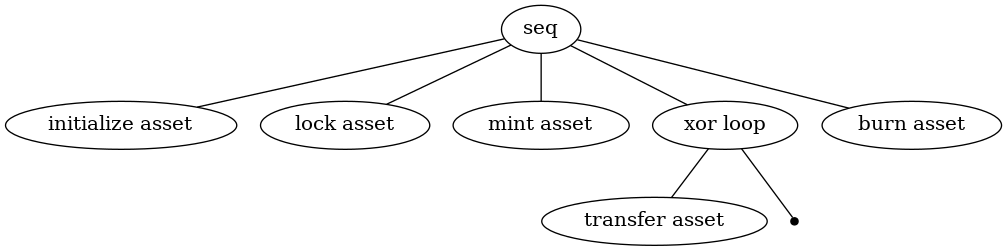

Execution Time : 0.001


NameError: name 'timeDiff' is not defined

In [13]:
#Another way to discover the tree
# # create the process tree
#tree = inductive_miner.apply_tree(log)

# viz
#gviz = pt_visualizer.apply(tree)
#pt_visualizer.view(gviz)# convert the process tree to a petri net

start_time = time.perf_counter()
process_tree = pm4py.discover_process_tree_inductive(log)
print(process_tree)
end_time = time.perf_counter()
pm4py.view_process_tree(process_tree)

start_time_2 = time.perf_counter()
bpmn_model = pm4py.convert_to_bpmn(process_tree)
end_time_2 = time.perf_counter()
print(f"Execution Time : {end_time_2 - start_time_2:0.3f}" )
timeDiff_2 = end_time_2 - start_time_2
print(f"Execution Time (ms): {timeDiff*1000:0.3f}" )

pm4py.view_bpmn(bpmn_model)

print(f"Start Time : {start_time}")
print(f"End Time : {end_time}")
timeDiff = end_time - start_time
print(f"Execution Time : {timeDiff_2:0.3f}")
print(f"Execution Time (ms): {timeDiff_2*1000:0.3f}" )


net, initial_marking, final_marking = pt_converter.apply(tree)

# alternatively, use the inductive_miner to create a petri net from scratch
# net, initial_marking, final_marking = inductive_miner.apply(log)

# viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}



/Users/rafaelapb/.conda/envs/cctx/lib/python3.10/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]


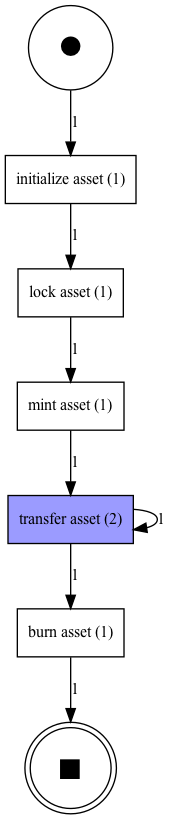

{'initialize asset': (node:initialize asset connections:{lock asset:[0.5]}), 'lock asset': (node:lock asset connections:{mint asset:[0.5]}), 'mint asset': (node:mint asset connections:{transfer asset:[0.5]}), 'transfer asset': (node:transfer asset connections:{transfer asset:[0.5], burn asset:[0.5]}), 'burn asset': (node:burn asset connections:{})}


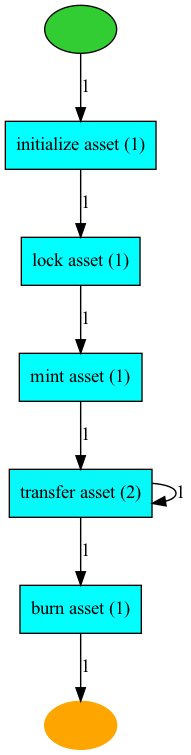

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
pm4py.view_dfg(dfg, start_activities, end_activities)

map = pm4py.discover_heuristics_net(log)
print(map)
pm4py.view_heuristics_net(map)

->( 'initialize asset', 'lock asset', 'mint asset', *( 'transfer asset', tau ), 'burn asset' )


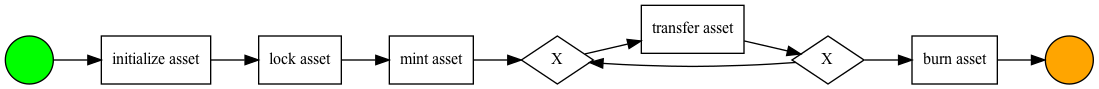

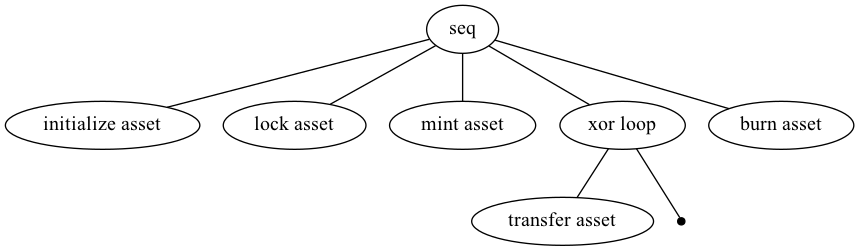

/Users/rafaelapb/.conda/envs/cctx/lib/python3.10/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]
/Users/rafaelapb/.conda/envs/cctx/lib/python3.10/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]


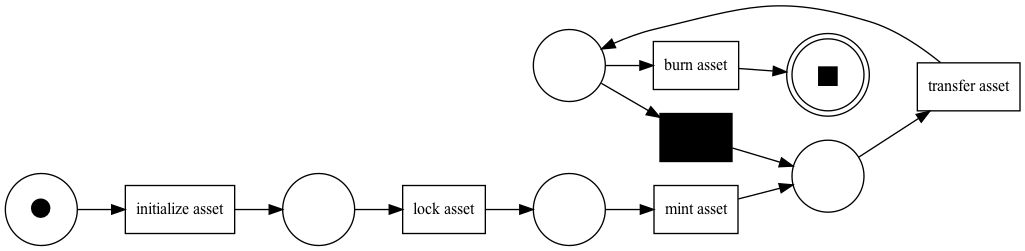

In [ ]:
# heuristics miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)